In [1]:
%matplotlib notebook
import numpy as np
import glob, os
import g0_init_cfg as ic
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from astropy.io import fits

# ----- Importing IRAF from the root directory ----- #
current_dir = os.getcwd()
os.chdir(ic.dir_iraf)

from pyraf import iraf
from pyraf.iraf import gemini, gmos

os.chdir(current_dir)
iraf.chdir(current_dir)

uparm parameter list `/home/jlee/anaconda3/envs/geminiconda/iraf/noao/imred/ccdred/ccdtest/ccdtest.par' inconsistent with default parameters for IrafPkg `ccdtest'


In [2]:
for d in ic.dir_wav:
    dir_sci = sorted(glob.glob(d+"/*"))

    for j in np.arange(len(dir_sci)):

        # Moving each science directory
        name_sci = dir_sci[j].split("/")[-1]
        print("Moving path for "+name_sci+"...")
        os.chdir(current_dir+"/"+dir_sci[j])
        iraf.chdir(current_dir+"/"+dir_sci[j])

        # FLAT
        flat = np.loadtxt(ic.lst_flat, dtype=str)
        flat0 = flat.item(0)
        
        # Find the gaps
        iraf.sections('blkmask_@'+ic.lst_flat, Stdout='blkmask.lis')
        iraf.delete('@blkmask.lis', verify='no')
        iraf.delete('blkmask.lis', verify='no')
        iraf.gffindblocks('rg'+flat0, 'erg'+flat0, 'blkmask_'+flat0)
        print('\n')
        
        # Coming back to current path
        os.chdir(current_dir)
        iraf.chdir(current_dir)  

Moving path for N20210517S0070...
1 512 74 78
1 512 344 351
1 512 616 621
1 512 887 892
1 512 1157 1160
1 512 1427 1431
1 512 1696 1701
1 512 1966 1970
1 512 2236 2241
1 512 2506 2511
1 512 2777 2781
1 512 3047 3050
1 512 3316 3322
1 512 3587 3591
1 512 3859 3862
1 512 4129 4133
16 gaps found


Moving path for N20210517S0071...
1 512 74 78
1 512 344 351
1 512 616 621
1 512 887 892
1 512 1157 1160
1 512 1427 1431
1 512 1696 1701
1 512 1966 1970
1 512 2236 2241
1 512 2506 2511
1 512 2777 2781
1 512 3047 3050
1 512 3316 3322
1 512 3587 3591
1 512 3859 3862
1 512 4129 4133
16 gaps found


Moving path for N20210517S0073...
1 512 74 78
1 512 344 351
1 512 616 621
1 512 887 892
1 512 1157 1160
1 512 1427 1431
1 512 1696 1701
1 512 1966 1970
1 512 2236 2241
1 512 2506 2511
1 512 2777 2781
1 512 3047 3050
1 512 3316 3322
1 512 3587 3591
1 512 3859 3862
1 512 4129 4133
16 gaps found


Moving path for N20210517S0074...
1 512 74 78
1 512 344 351
1 512 616 621
1 512 887 892
1 512 1157 1160
1 512 14

Moving path for N20210517S0070...


<IPython.core.display.Javascript object>


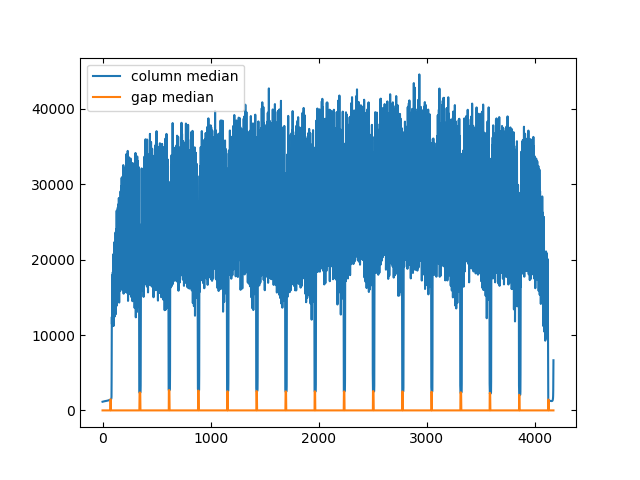

Moving path for N20210517S0071...


<IPython.core.display.Javascript object>


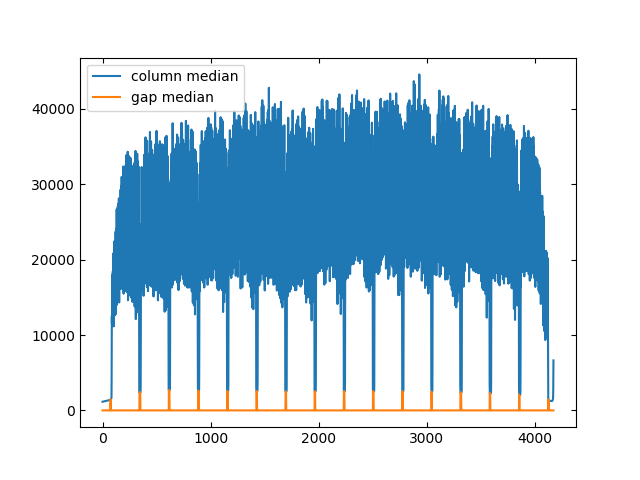

Moving path for N20210517S0073...


<IPython.core.display.Javascript object>


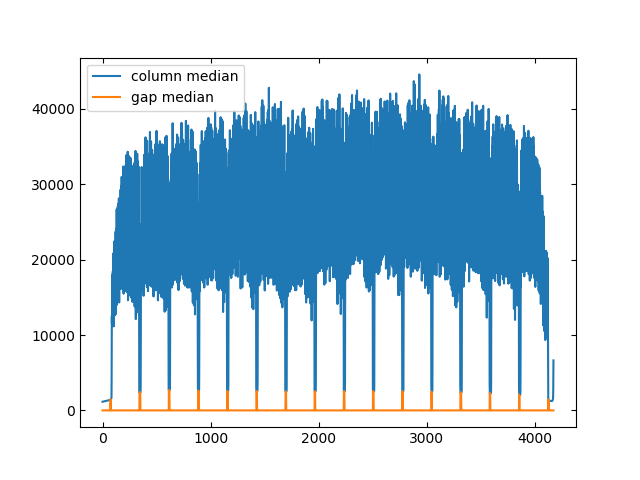

Moving path for N20210517S0074...


<IPython.core.display.Javascript object>


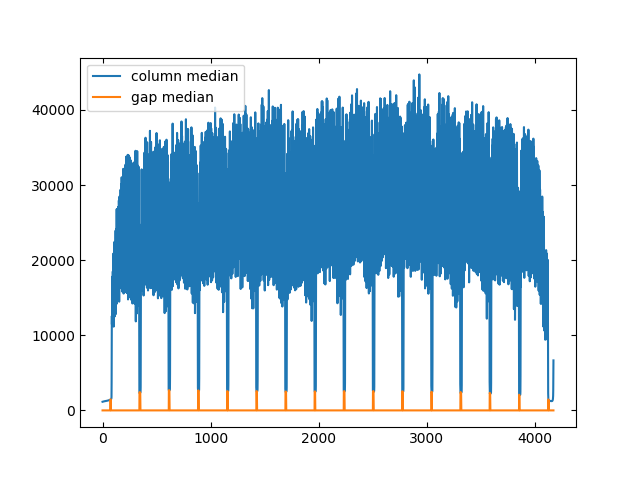

Moving path for N20210620S0022...


<IPython.core.display.Javascript object>


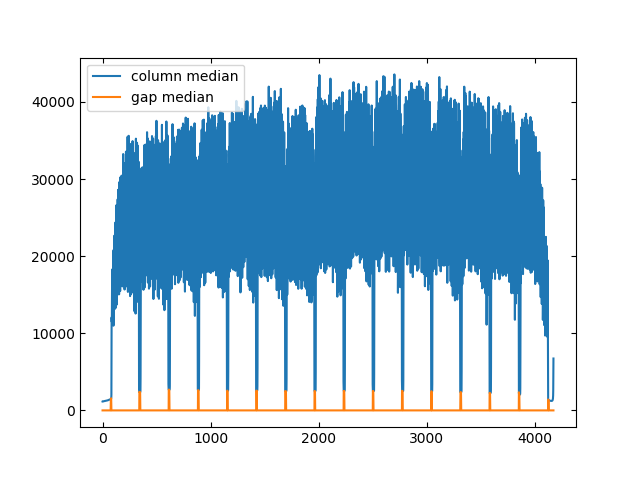

Moving path for N20210620S0023...


<IPython.core.display.Javascript object>


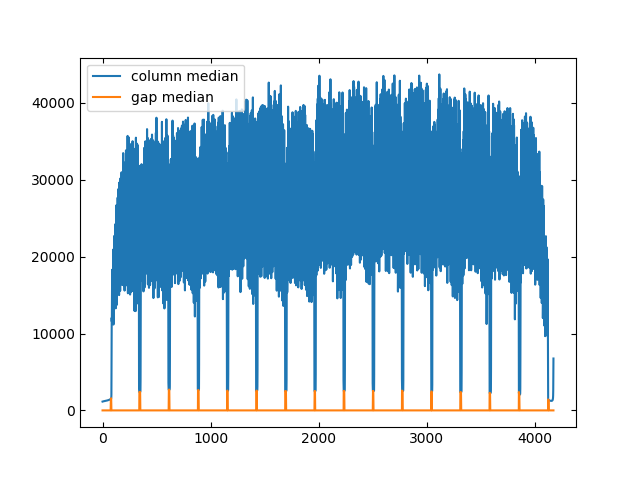

Moving path for N20210620S0025...


<IPython.core.display.Javascript object>


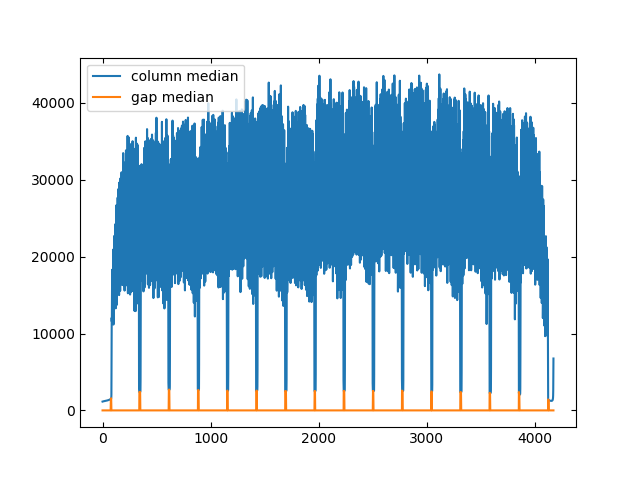

Moving path for N20210517S0077...


<IPython.core.display.Javascript object>


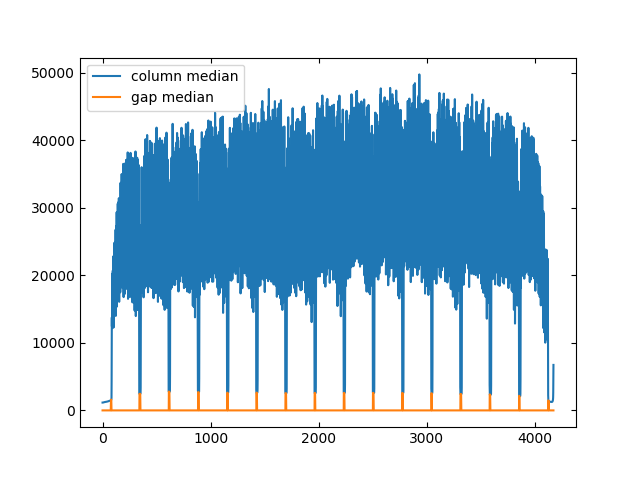

Moving path for N20210620S0016...


<IPython.core.display.Javascript object>


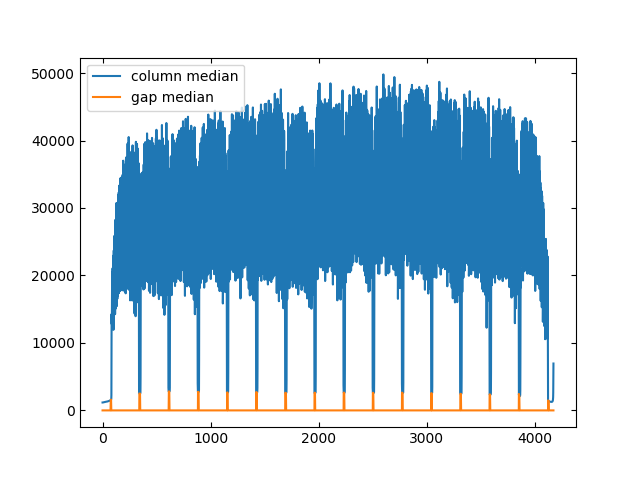

Moving path for N20210620S0018...


<IPython.core.display.Javascript object>


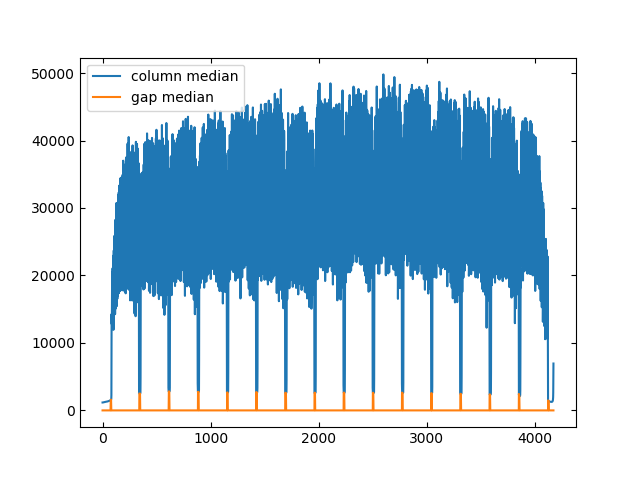

Moving path for N20210620S0019...


<IPython.core.display.Javascript object>


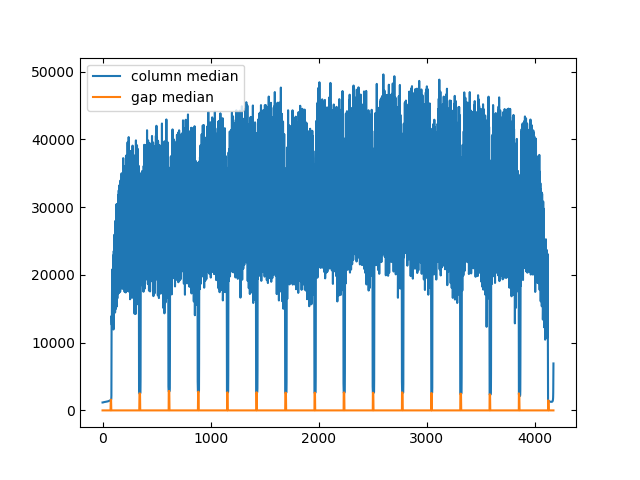

In [3]:
for d in ic.dir_wav:
    dir_sci = sorted(glob.glob(d+"/*"))

    for j in np.arange(len(dir_sci)):

        # Moving each science directory
        name_sci = dir_sci[j].split("/")[-1]
        print("Moving path for "+name_sci+"...")
        os.chdir(current_dir+"/"+dir_sci[j])
        iraf.chdir(current_dir+"/"+dir_sci[j])
        
        # FLAT
        flat = np.loadtxt(ic.lst_flat, dtype=str)
        flat0 = flat.item(0)
        
        # Reading FITS images
        flat_name = 'rg'+flat0+'.fits'
        rg = fits.getdata(flat_name, ext=1)

        # Reading blkmask file made by IRAF/Gemini package
        msk_ascii = np.genfromtxt('blkmask_'+flat0, dtype=int)

        # Mask flagging (int_msk : from IRAF/Gemini)
        int_msk = rg*0
        for i in np.arange(msk_ascii.shape[0]):
            reg = (msk_ascii[i]-1).tolist()
            int_msk[reg[2]-1:reg[3], :] = 1
        bin_msk = (int_msk == 1)
        
        # Checkplots
        fig, ax = plt.subplots()
        ax.plot(np.median(rg, axis=1), label='column median')
        ax.plot(np.median(int_msk*rg, axis=1), zorder=+10, label='gap median')
        plt.legend()

        # Coming back to current path
        os.chdir(current_dir)
        iraf.chdir(current_dir)

In [4]:
for d in ic.dir_wav:
    dir_sci = sorted(glob.glob(d+"/*"))

    for j in np.arange(len(dir_sci)):

        # Moving each science directory
        name_sci = dir_sci[j].split("/")[-1]
        print("Moving path for "+name_sci+"...")
        os.chdir(current_dir+"/"+dir_sci[j])
        iraf.chdir(current_dir+"/"+dir_sci[j])

        # FLAT
        flat = np.loadtxt(ic.lst_flat, dtype=str)
        flat0 = flat.item(0)
        
        # Checking gaps
        all_gaps_are_ok = True  # If False, new gap mask file should be written below.

        if all_gaps_are_ok:
            blkmsk_name = 'blkmask_'+flat0
        else:
            blkmsk_name = 'newblkmask_'+flat0

        with open("blkmask_name.txt", "w") as f:
            f.write(blkmsk_name+"\n")

        # Coming back to current path
        os.chdir(current_dir)
        iraf.chdir(current_dir)

Moving path for N20210517S0070...
Moving path for N20210517S0071...
Moving path for N20210517S0073...
Moving path for N20210517S0074...
Moving path for N20210620S0022...
Moving path for N20210620S0023...
Moving path for N20210620S0025...
Moving path for N20210517S0077...
Moving path for N20210620S0016...
Moving path for N20210620S0018...
Moving path for N20210620S0019...
